### Cancer classification achieving 97% F1 score

In [1]:
!python -m venv sklearn-env
!sklearn-env\Scripts\activate  # activate
!pip install -U scikit-learn


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn.datasets as ds
dataset = ds.load_breast_cancer(as_frame=True)


In [4]:
#convert to dataframe
df = dataset.frame


## General idea of dataset

In [8]:
print(df.head())
print(df.info())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
print(df.target.value_counts()) #No it's not balanced but it is managable

target
1    357
0    212
Name: count, dtype: int64


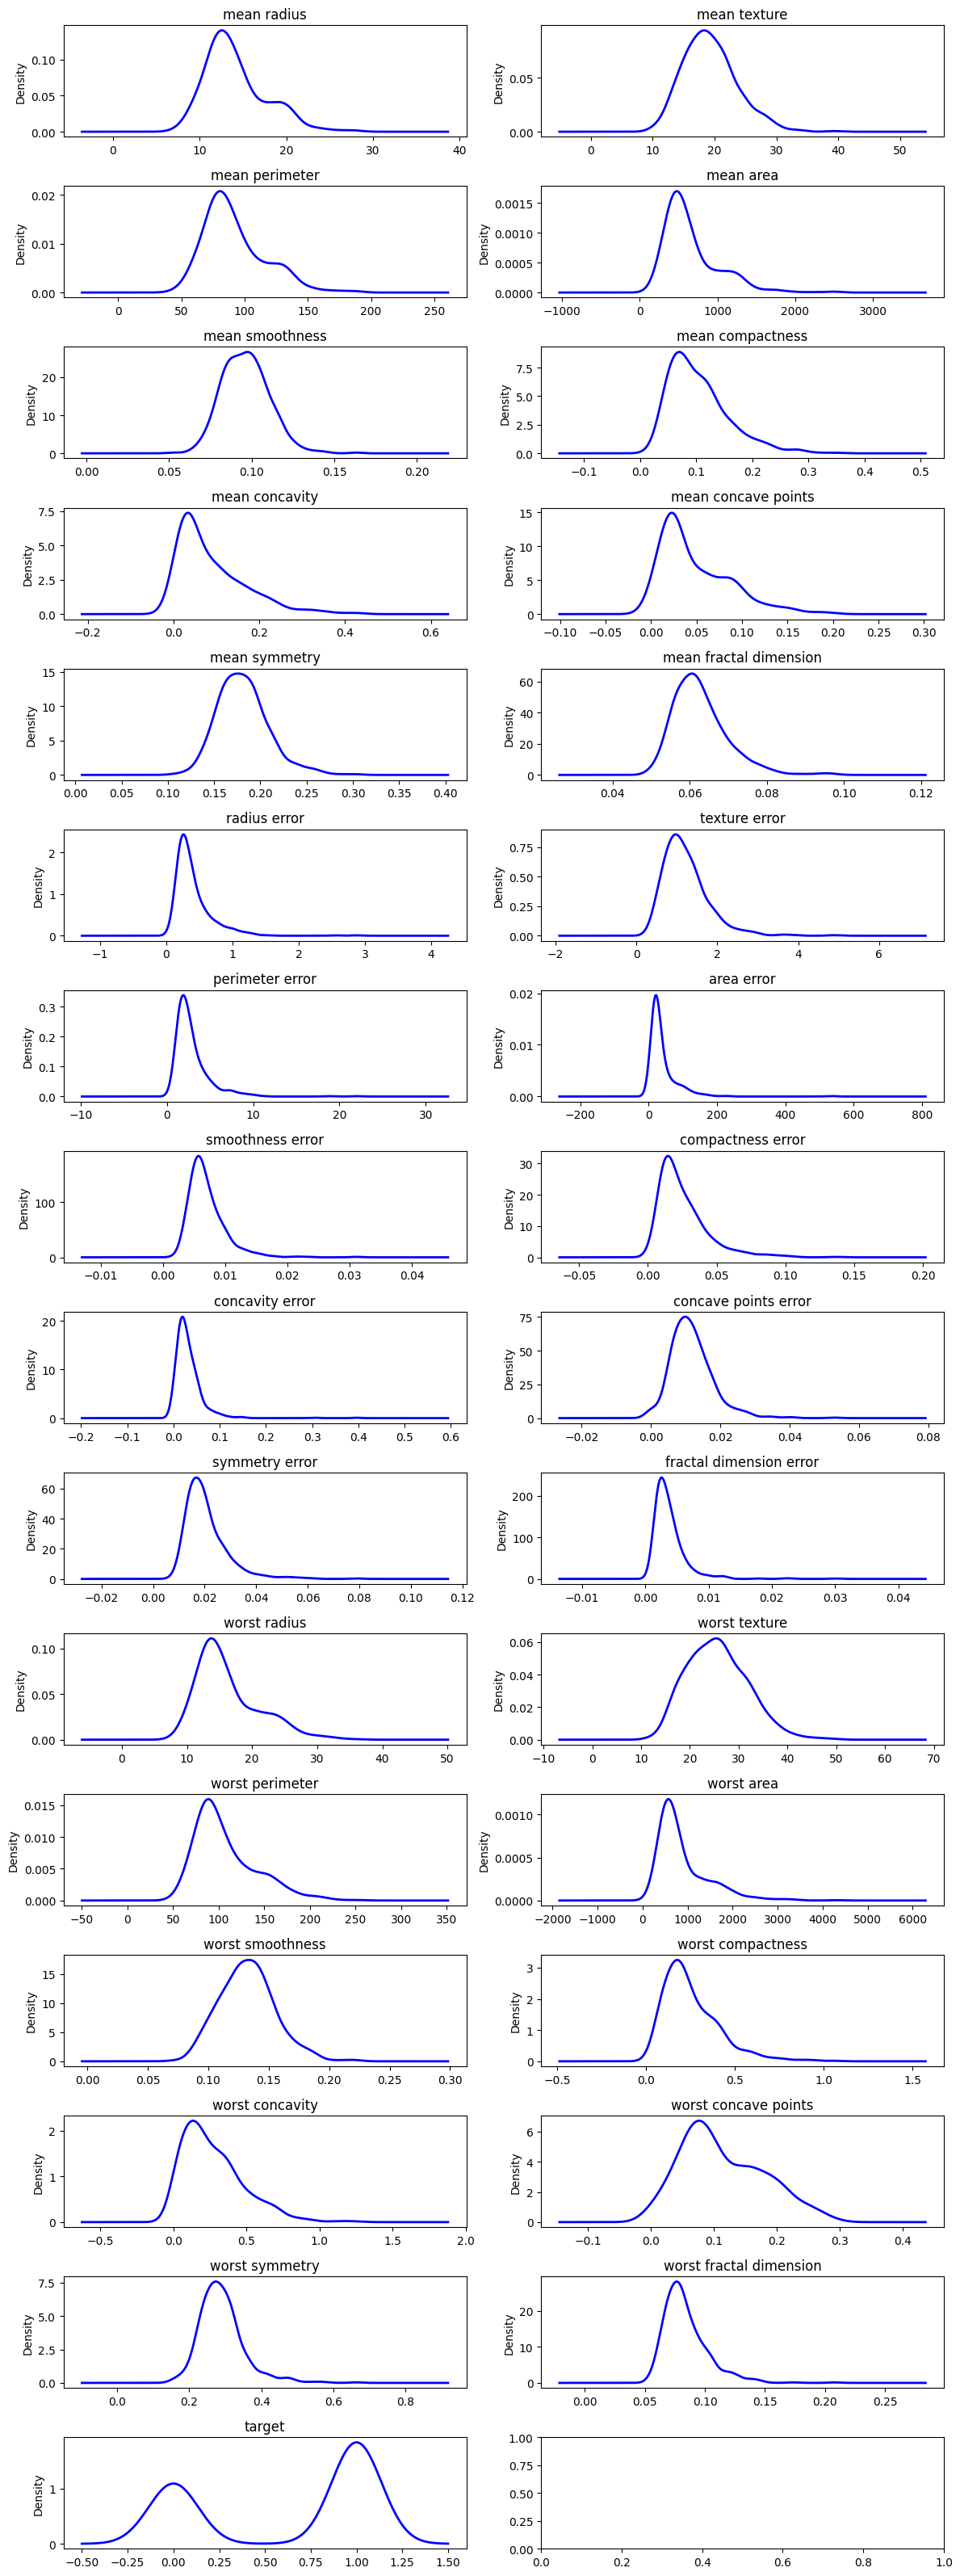

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# cols_to_plot = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean perimeter']
cols_to_plot = list(df.columns.values)

fig, ax = plt.subplots(nrows=16, ncols=2, figsize=(12, 32))
axes = ax.flatten()  # makes it easy to loop

for i, col_name in enumerate(cols_to_plot):
    df[col_name].plot(
        kind='density',
        bw_method='scott',
        color='blue',
        linestyle='-',
        linewidth=2,
        ax=axes[i]
    )
    axes[i].set_title(col_name)

plt.tight_layout()
plt.show()


<Axes: >

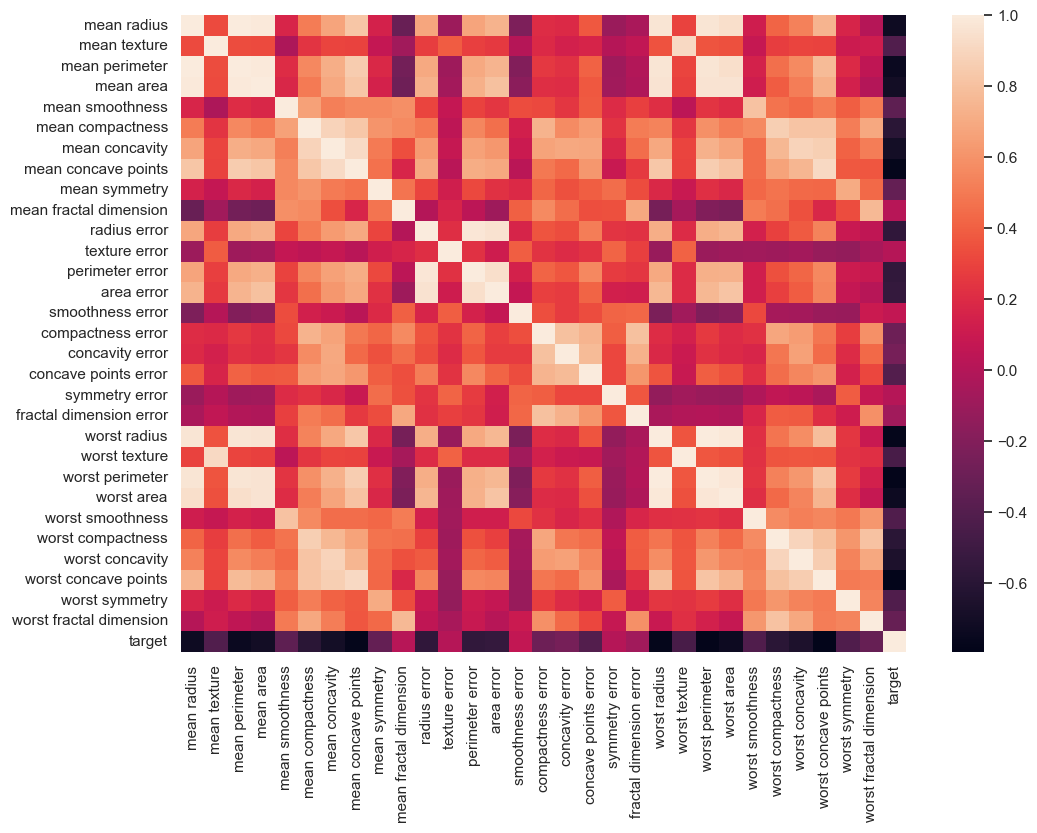

In [6]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)


In [10]:
#most correlated pairs
import numpy as np
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
# print(sol[:5])

#least correlated features
print(sol[:(len(sol)- 1)])

mean radius              mean perimeter             0.997855
worst radius             worst perimeter            0.993708
mean radius              mean area                  0.987357
mean perimeter           mean area                  0.986507
worst radius             worst area                 0.984015
                                                      ...   
symmetry error           target                     0.006522
mean perimeter           fractal dimension error    0.005523
mean area                worst fractal dimension    0.003738
fractal dimension error  worst texture              0.003195
                         worst perimeter            0.001000
Length: 464, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_test))


455
114


In [14]:
#fit scaler on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)

,copy,True
,with_mean,True
,with_std,True


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

TEST RESULTS
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       164
           1       0.96      0.97      0.96       291

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

TEST RESULTS
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       164
           1       0.93      0.96      0.95       291

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455



In [ ]:
from sklearn.naive_bayes import BernoulliNB
#AWFUL RESULTS!
model = BernoulliNB()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

TEST RESULTS
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.64      1.00      0.78       291

    accuracy                           0.64       455
   macro avg       0.32      0.50      0.39       455
weighted avg       0.41      0.64      0.50       455



d:\ProgrammingLanguages\PYTHON11\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ProgrammingLanguages\PYTHON11\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ProgrammingLanguages\PYTHON11\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\P

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
estimators = [
    ("randomForest", RandomForestClassifier()),
    ("logisticRegression", LogisticRegression(max_iter=5000)),
    ("XGBclassifier", HistGradientBoostingClassifier()),
    ("KNNClassifier", KNeighborsClassifier(n_neighbors=3)),
    ("AdaBoostClassifier", AdaBoostClassifier())
]
model = StackingClassifier(estimators, final_estimator=LogisticRegression(max_iter=5000))
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

TEST RESULTS
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_leaf=2,
    n_jobs=-1, random_state=42
)

lr = make_pipeline(
    StandardScaler(with_mean=False),  # set with_mean=False if x is sparse; else True
    LogisticRegression(max_iter=5000, C=1.0, class_weight=None, random_state=42)
)

hgb = HistGradientBoostingClassifier(
    max_depth=None, learning_rate=0.07, max_leaf_nodes=31,
    l2_regularization=1.0, random_state=42
)

knn = make_pipeline(
    StandardScaler(with_mean=False),
    KNeighborsClassifier(n_neighbors=5, weights="distance")
)

adb = AdaBoostClassifier(
    n_estimators=300, learning_rate=0.05, random_state=42
)

estimators = [
    ("rf", rf),
    ("lr", lr),
    ("hgb", hgb),
    ("knn", knn),
    ("adb", adb),
]

meta = LogisticRegression(
    max_iter=5000, C=0.5, penalty="l2", random_state=42
)

model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta,
    passthrough=True,
    stack_method="auto",
    cv=5,            # out-of-fold predictions → better generalization
    n_jobs=-1
)

model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))


TEST RESULTS
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       164
           1       0.99      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455



In [31]:
dup_train = pd.DataFrame(x_train).duplicated().sum()
overlap = pd.merge(pd.DataFrame(x_train).assign(_t=1),
                   pd.DataFrame(x_test).assign(_t=2), how="inner").shape[0]
print("Duplicate rows in train:", dup_train)
print("Exact overlaps train↔test:", overlap)

Duplicate rows in train: 0
Exact overlaps train↔test: 0


In [32]:
from sklearn.experimental import enable_hist_gradient_boosting  # no-op if recent sklearn
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report
import numpy as np

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

param_grid = {
    "learning_rate": [0.03, 0.05, 0.1],
    "max_leaf_nodes": [15, 31, 63],
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [10, 20, 50],
    "l2_regularization": [0.0, 0.5, 1.0, 2.0]
}
hgb = HistGradientBoostingClassifier(random_state=42)
gs = GridSearchCV(hgb, param_grid, scoring="f1", cv=cv, n_jobs=-1, refit=True, verbose=0)
gs.fit(x_train, y_train)
best = gs.best_estimator_
print("Best HGB:", gs.best_params_, "CV f1:", gs.best_score_)


d:\ProgrammingLanguages\PYTHON11\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Best HGB: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': None, 'max_leaf_nodes': 15, 'min_samples_leaf': 50} CV f1: 0.9727995408326826


In [33]:
# model.fit(x_train, y_train)
y_pred_test = best.predict(x_test)
print("TEST RESULTS")
print(classification_report(y_test, y_pred_test))
print("TRAIN RESULTS")
y_pred_train = best.predict(x_train)
print(classification_report(y_train, y_pred_train))

TEST RESULTS
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.94      0.98      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

TRAIN RESULTS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

